In [17]:
print("Hello, Machine Learning!")

Hello, Machine Learning!


## 機械学習　学習ノート
中井悦司著「ITエンジニアのための機械学習理論入門」の学習メモ・ソースコード実行結果まとめ

### 第１章　データサイエンスと機械学習

本書の目的・・・ビジネスに機械学習を役立てるには、ビジネスの理解と機械学習アルゴリズムの理解が両方必要。

機械学習アルゴリズムの分類
- 分類・・・複数クラスに分類された既存データを元に、新規データがどのクラスに属するかを予測する
 - アルゴリズム）第４章パーセプトロン・第５章ロジスティック回帰
 - 実用例）スパムメールの判定
- 回帰分析・・・既存データを表す関数を推測することで、次に得られるデータの数値を予測する
 - アルゴリズム）第２章最小二乗法・第３章最尤推定法・第８章ベイズ推定
 - 実用例）広告宣伝費と売上の関係
- クラスタリング・・・教師なしデータのグループ化を行う
 - アルゴリズム）第６章k平均法・第７章EMアルゴリズム
 - 実用例）文字の自動認識
- その他のアルゴリズム・・・類似マッチング、共起分析、リンク予測など

### 第２章　最小二乗法

データセット
$$
    (x_n,t_n) \quad (n = 1, 2, ..., N)
$$
を以下の多項式で近似することを考える。
$$
    f(x) = w_0 + w_1x + w_2x^2 + ... + w_Mx^M = \sum_{m=0}^{M}w_mx^m
$$
実際の観測値t_nに対して誤差Eを定義する。
$$
    E = \sum_{n=1}^{N}(f(x_n)-t_n)^2
$$ 
Eを最小化するパラメータ（近似多項式の係数）は、行列を用いて以下で計算できる。
$$
    \boldsymbol{w} = (\boldsymbol{\Phi}^T\boldsymbol{\Phi})^{-1}\boldsymbol{\Phi}^T\boldsymbol{t}
$$
ただし、
$$
    \boldsymbol{w} = (w_0,\cdots,w_M)^T \\
    \boldsymbol{t} = (t_1,\cdots,t_N)^T \\
    \boldsymbol{\Phi} =
        \left[\begin{array}{cccc}
            x_1^0 & x_1^1 & \cdots & x_1^M \\
            x_2^0 & x_2^1 & \cdots & x_2^M \\
            \vdots  & \vdots & \ddots & \vdots \\
            x_N^0 & x_N^1 & \cdots & x_N^M \\
        \end{array}\right] \\
$$     
である。  
  
  
例として以下のプログラムでは、正弦関数に、正規分布の平均0.3の誤差を加えたデータを多項式で近似する。  
トレーニングセットの個数Nが多いほど近似が正確になり、多項式の次数Mはある一定値以上にするとテストセットに対する誤差はE＝0.3に収束することが分かる。   
それ以上次数を増やしてもオーバーフィッティング（過学習）となり意味がない。  
過学習・・・トレーニングセットに特化しすぎてテストセットに対応できていないこと。  

Table of the coefficients
        M=0       M=1        M=3            M=9
0 -0.080614  0.815461   0.194218       0.119629
1       NaN -1.792150   8.127230      -6.259960
2       NaN       NaN -25.792154     434.373261
3       NaN       NaN  17.051653   -5058.019850
4       NaN       NaN        NaN   27832.025904
5       NaN       NaN        NaN  -85473.298307
6       NaN       NaN        NaN  153247.296562
7       NaN       NaN        NaN -158929.658098
8       NaN       NaN        NaN   88221.435177
9       NaN       NaN        NaN  -20268.419735


/Users/aoyagi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


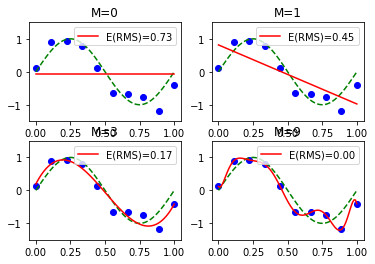

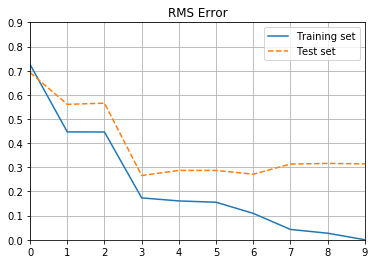

In [14]:
# -*- coding: utf-8 -*-
#
# 誤差関数（最小二乗法）による回帰分析
#
# 2015/04/22 ver1.0
#

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import normal

#------------#
# Parameters #
#------------#
N=10            # サンプルを取得する位置 x の個数
M=[0,1,3,9]     # 多項式の次数

# データセット {x_n,y_n} (n=1...N) を用意
def create_dataset(num):
    dataset = DataFrame(columns=['x','y'])
    for i in range(num):
        x = float(i)/float(num-1)
        y = np.sin(2*np.pi*x) + normal(scale=0.3)
        dataset = dataset.append(Series([x,y], index=['x','y']),
                                 ignore_index=True)
    return dataset

# 平方根平均二乗誤差（Root mean square error）を計算
def rms_error(dataset, f):
    err = 0.0
    for index, line in dataset.iterrows():
        x, y = line.x, line.y
        err += 0.5 * (y - f(x))**2
    return np.sqrt(2 * err / len(dataset))

# 最小二乗法で解を求める
def resolve(dataset, m):
    t = dataset.y
    phi = DataFrame()
    for i in range(0,m+1):
        p = dataset.x**i
        p.name="x**%d" % i
        phi = pd.concat([phi,p], axis=1)
    tmp = np.linalg.inv(np.dot(phi.T, phi))
    ws = np.dot(np.dot(tmp, phi.T), t)

    def f(x):
        y = 0
        for i, w in enumerate(ws):
            y += w * (x ** i)
        return y

    return (f, ws)

# Main
if __name__ == '__main__':
    train_set = create_dataset(N)
    test_set = create_dataset(N)
    df_ws = DataFrame()

    # 多項式近似の曲線を求めて表示
    fig = plt.figure()
    for c, m in enumerate(M):
        f, ws = resolve(train_set, m)
        df_ws = df_ws.append(Series(ws,name="M=%d" % m))

        subplot = fig.add_subplot(2,2,c+1)
        subplot.set_xlim(-0.05,1.05)
        subplot.set_ylim(-1.5,1.5)
        subplot.set_title("M=%d" % m)

        # トレーニングセットを表示
        subplot.scatter(train_set.x, train_set.y,
                        marker='o', color='blue', label=None)

        # 真の曲線を表示
        linex = np.linspace(0,1,101)
        liney = np.sin(2*np.pi*linex)
        subplot.plot(linex, liney, color='green', linestyle='--')

        # 多項式近似の曲線を表示
        linex = np.linspace(0,1,101)
        liney = f(linex)
        label = "E(RMS)=%.2f" % rms_error(train_set, f)
        subplot.plot(linex, liney, color='red', label=label)
        subplot.legend(loc=1)

    # 係数の値を表示
    print ("Table of the coefficients")
    print (df_ws.transpose())
    fig.show()

    # トレーニングセットとテストセットでの誤差の変化を表示
    df = DataFrame(columns=['Training set','Test set'])
    for m in range(0,10):   # 多項式の次数
        f, ws = resolve(train_set, m)
        train_error = rms_error(train_set, f)
        test_error = rms_error(test_set, f)
        df = df.append(
                Series([train_error, test_error],
                    index=['Training set','Test set']),
                ignore_index=True)
    df.plot(title='RMS Error', style=['-','--'], grid=True, ylim=(0,0.9))
    plt.show()


### 第３章　最尤推定法

第２章と同じく、データはＭ次多項式で表されると仮定する。  
$$
    f(x) = w_0 + w_1x + w_2x^2 + ... + w_Mx^M = \sum_{m=0}^{M}w_mx^m
$$
それに加え今回は、各データが正規分布Ｎに従う誤差をとると仮定する。
$$
    N(x\mid \mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2\sigma^2}(x-\mu)^2}
$$    
トレーニングセットのデータ
$$
    (x_n,t_n) \quad (n = 1, 2, ..., N)
$$
が得られる確率Pは、
$$
    P = \prod_{n=1}^{N}P_n = \prod_{n=1}^{N} N(t_n\mid f(x_n), \sigma^2) = \prod_{n=1}^{N} \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2\sigma^2}(t_n-f(x_n))^2}
$$
さらに以下の仮説が正しいと仮定。  
仮説：「トレーニングセットで与えられたデータは最も発生確率が高いものである。」

以上を元に、尤度関数Pを最大化するパラメータ
$$
    \boldsymbol{w}, \sigma
$$
を求める。

結論：多項式の係数は最小二乗法と一致。標準偏差は平方根平均二乗誤差に一致。  
$$
    \boldsymbol{w} = (\boldsymbol{\Phi}^T\boldsymbol{\Phi})^{-1}\boldsymbol{\Phi}^T\boldsymbol{t} \\
    \sigma = E_{RMS} = \sqrt{\frac{1}{N}\sum_{n=1}^{N}(\sum_{m=0}^{M}w_mx_n^m-t_n)^2} \\
$$
このことから、前章の最小二乗法は、最尤推定法の中でも特に、正規分布の誤差を仮定していたものだとわかる。

/Users/aoyagi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


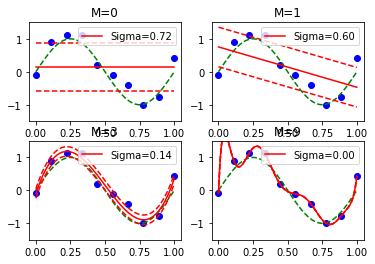

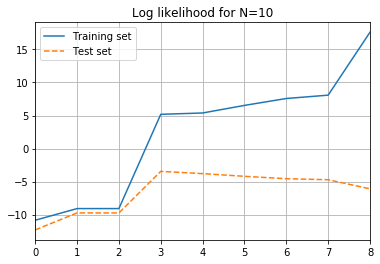

In [15]:
# -*- coding: utf-8 -*-
#
# 最尤推定による回帰分析
#
# 2015/05/19 ver1.0
#

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import normal

#------------#
# Parameters #
#------------#
N=10            # サンプルを取得する位置 x の個数
M=[0,1,3,9]     # 多項式の次数


# データセット {x_n,y_n} (n=1...N) を用意
def create_dataset(num):
    dataset = DataFrame(columns=['x','y'])
    for i in range(num):
        x = float(i)/float(num-1)
        y = np.sin(2*np.pi*x) + normal(scale=0.3)
        dataset = dataset.append(Series([x,y], index=['x','y']),
                                 ignore_index=True)
    return dataset

# 最大対数尤度（Maximum log likelihood）を計算
def log_likelihood(dataset, f):
    dev = 0.0
    n = float(len(dataset))
    for index, line in dataset.iterrows():
        x, y = line.x, line.y
        dev += (y - f(x))**2
    err = dev * 0.5
    beta = n / dev
    lp = -beta*err + 0.5*n*np.log(0.5*beta/np.pi)
    return lp

# 最尤推定で解を求める（解法は最小二乗法と同じ）
def resolve(dataset, m):
    t = dataset.y
    phi = DataFrame()
    for i in range(0,m+1):
        p = dataset.x**i
        p.name="x**%d" % i
        phi = pd.concat([phi,p], axis=1)
    tmp = np.linalg.inv(np.dot(phi.T, phi))
    ws = np.dot(np.dot(tmp, phi.T), t)

    def f(x):
        y = 0.0
        for i, w in enumerate(ws):
            y += w * (x ** i)
        return y

    sigma2 = 0.0
    for index, line in dataset.iterrows():
        sigma2 += (f(line.x)-line.y)**2
    sigma2 /= len(dataset)

    return (f, ws, np.sqrt(sigma2))

# Main
if __name__ == '__main__':
    train_set = create_dataset(N)
    test_set = create_dataset(N)
    df_ws = DataFrame()

    # 多項式近似の曲線を求めて表示
    fig = plt.figure()
    for c, m in enumerate(M):
        f, ws, sigma = resolve(train_set, m)
        df_ws = df_ws.append(Series(ws,name="M=%d" % m))

        subplot = fig.add_subplot(2,2,c+1)
        subplot.set_xlim(-0.05,1.05)
        subplot.set_ylim(-1.5,1.5)
        subplot.set_title("M=%d" % m)

        # トレーニングセットを表示
        subplot.scatter(train_set.x, train_set.y,
                        marker='o', color='blue', label=None)

        # 真の曲線を表示
        linex = np.linspace(0,1,101)
        liney = np.sin(2*np.pi*linex)
        subplot.plot(linex, liney, color='green', linestyle='--')

        # 多項式近似の曲線を表示
        linex = np.linspace(0,1,101)
        liney = f(linex)
        label = "Sigma=%.2f" % sigma
        subplot.plot(linex, liney, color='red', label=label)
        subplot.plot(linex, liney+sigma, color='red', linestyle='--')
        subplot.plot(linex, liney-sigma, color='red', linestyle='--')
        subplot.legend(loc=1)

    fig.show()

    # 多項式近似に対する最大対数尤度を計算
    df = DataFrame()
    train_mlh = []
    test_mlh = []
    for m in range(0,9): # 多項式の次数
        f, ws, sigma = resolve(train_set, m)
        train_mlh.append(log_likelihood(train_set, f))
        test_mlh.append(log_likelihood(test_set, f))
    df = pd.concat([df,
                    DataFrame(train_mlh, columns=['Training set']),
                    DataFrame(test_mlh, columns=['Test set'])],
                    axis=1)
    df.plot(title='Log likelihood for N=%d' % N, grid=True, style=['-','--'])
    plt.show()


### 第４章　パーセプトロン

いま、平面上に○か×の情報を持つデータが散らばっている。これらを正しく分ける直線の方程式f(x,y)を求めたい。
$$
    f(x,y)=w_0+w_1x+w_2y=0
$$
○をt=+1,×をt=-1として、以下のルールでデータを分類することにする。
$$
    f(x,y)>0 \Rightarrow t=+1 \\
    f(x,y)<0 \Rightarrow t=-1 \\
$$
つまり、トレーニングセット(x_n,y_n,t_n)に対して、
$$
    f(x_n,y_n)×t_n>0 \Rightarrow 正解 \\
    f(x_n,y_n)×t_n<0 \Rightarrow 不正解 \\
    \\
$$
正しく判別できていない点についてのみ、ペナルティとして以下の誤差関数を定義する。  
$$
    E = \sum_{n}E_n = \sum_{n}|f(x_n,y_n)|
$$
この誤差関数では、直線から離れて大きく誤判定している点のペナルティが大きくなるようになっている。  
また、上記の不正解の条件より
$$
    |f(x_n,y_n)| = -f(x_n,y_n)×t_n \\
$$
なので、以下のように変形できる。
$$
    E = -\sum_{n}(w_0+w_1x_n+w_2y_n)t_n = -\sum_{n}t_n\boldsymbol{w}^T\phi_n \\
$$
ただし、 
$$
    \boldsymbol{w} = (w_0,w_1,w_2)^T \\
    \phi_n = (1,x_n,y_n)^T \\
$$
誤差関数が小さくなるように直線の方程式を求めたいが、前章までとは異なり、パラメータを解析的に求めることはできない。  
代わりに以下の作業を行えば、誤差が小さくなることが知られている。

「正しく分類していない点を確率的にどれか１つ選び、その点で計算される誤差関数の勾配ベクトルの逆方向
$$
    -\nabla E(\boldsymbol{w}) = \sum_{n}t_n\phi_n
$$
に、
$$
    \boldsymbol{w_{new}}=\boldsymbol{w_{old}}+t_n\phi_n
$$となるようにパラメータを修正する。」

この作業を、誤判定している点がなくなるまで（完全に判別することが不可能なら誤差関数が小さくなるまで）繰り返す。

ちなみに、確率的に点を選ぶのは、全てのデータについて計算すると計算量が膨大になるのを防ぐためである。

/Users/aoyagi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


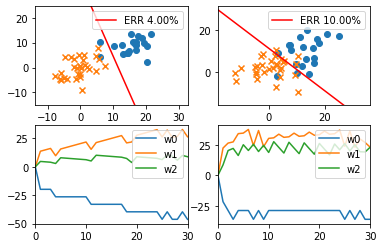

In [23]:
# -*- coding: utf-8 -*-
#
# Perceptronによる二項分類
#
# 2015/04/24 ver1.0
#

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import multivariate_normal

#------------#
# Parameters #
#------------#

N1 = 20         # クラス t=+1 のデータ数
Mu1 = [15,10]   # クラス t=+1 の中心座標

N2 = 30         # クラス t=-1 のデータ数
Mu2 = [0,0]     # クラス t=-1 の中心座標

Variances = [15,30] # 両クラス共通の分散（2種類の分散で計算を実施）


# データセット {x_n,y_n,type_n} を用意
def prepare_dataset(variance):
    cov1 = np.array([[variance,0],[0,variance]])
    cov2 = np.array([[variance,0],[0,variance]])

    df1 = DataFrame(multivariate_normal(Mu1,cov1,N1),columns=['x','y'])
    df1['type'] = 1
    df2 = DataFrame(multivariate_normal(Mu2,cov2,N2),columns=['x','y'])
    df2['type'] = -1 
    df = pd.concat([df1,df2],ignore_index=True)
    df = df.reindex(np.random.permutation(df.index)).reset_index(drop=True)
    return df

# Perceptronのアルゴリズム（確率的勾配降下法）を実行
def run_simulation(variance, data_graph, param_graph):
    train_set = prepare_dataset(variance)
    train_set1 = train_set[train_set['type']==1]
    train_set2 = train_set[train_set['type']==-1]
    ymin, ymax = train_set.y.min()-5, train_set.y.max()+10
    xmin, xmax = train_set.x.min()-5, train_set.x.max()+10
    data_graph.set_ylim([ymin-1, ymax+1])
    data_graph.set_xlim([xmin-1, xmax+1])
    data_graph.scatter(train_set1.x, train_set1.y, marker='o', label=None)
    data_graph.scatter(train_set2.x, train_set2.y, marker='x', label=None)

    # パラメータの初期値とbias項の設定
    w0 = w1 = w2 = 0.0
    bias = 0.5 * (train_set.x.abs().mean() + train_set.y.abs().mean())

    # Iterationを30回実施
    paramhist = DataFrame([[w0,w1,w2]], columns=['w0','w1','w2'])
    for i in range(30):
        for index, point in train_set.iterrows():
            x, y, type = point.x, point.y, point.type
            if type * (w0*bias + w1*x + w2*y) <= 0:
                w0 += type * bias
                w1 += type * x
                w2 += type * y
        paramhist = paramhist.append(
                        Series([w0,w1,w2], ['w0','w1','w2']),
                        ignore_index=True)
    # 判定誤差の計算
    err = 0.0
    for index, point in train_set.iterrows():
        x, y, type = point.x, point.y, point.type
        if type * (w0*bias + w1*x + w2*y) <= 0:
            err += 1
    err_rate = err * 100 / len(train_set)

    # 結果の表示
    linex = np.arange(xmin-5, xmax+5)
    liney = - linex * w1 / w2 - bias * w0 / w2
    label = "ERR %.2f%%" % err_rate
    data_graph.plot(linex, liney, label=label, color='red')
    data_graph.legend(loc=1)
    paramhist.plot(ax=param_graph)
    param_graph.legend(loc=1)

# Main
if __name__ == '__main__':
    fig = plt.figure()
    # 2種類の分散で実行
    for c, variance in enumerate(Variances):
        subplots1 = fig.add_subplot(2,2,c+1)
        subplots2 = fig.add_subplot(2,2,c+2+1)
        run_simulation(variance, subplots1, subplots2)
    fig.show()


### 第５章　ロジスティック回帰とROC曲線
前章と同じ分類アルゴリズムだが、最尤推定法を用いた確率的な推定ができる。  
例：「このデータはグループAに属する」→「このデータがグループAに属する確率は80％である」  

分類直線
$$
    f(x,y)=w_0+w_1x+w_2y=0
$$
の直交ベクトルに以下のロジスティック曲線を重ね合わせる。
$$
    \sigma(a) = \frac{1}{1+e^{-a}}
$$
  
点(x,y)で得られたデータの属性がグループAとなる確率を、
$$
    P(x,y)=\sigma(w_0+w_1x+w_2y)
$$
グループBとなる確率を、
$$
    1-P(x,y)
$$
とする。  
  
このとき、トレーニングセットの特定のデータ１つが得られる確率は、
$$
    P_n = P(x_n,y_n)^{t_n}(1-P(x_n,y_n))^{1-t_n} = z_n^{t_n} (1-z_n)^{1-t_n}
$$
よってトレーニングセット全体のデータが得られる確率は、
$$
    P = \prod_{n=1}^{N}P_n = \prod_{n=1}^{N} z_n^{t_n} (1-z_n)^{1-t_n}
$$
この尤度関数Pを最大化するパラメータwをニュートンラフソン法で求める。


/Users/aoyagi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/aoyagi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/aoyagi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:138: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


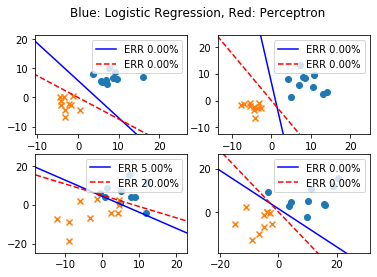

In [24]:
# -*- coding: utf-8 -*-
#
# ロジスティック回帰とパーセプトロンの比較
#
# 2015/04/24 ver1.0
#

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import rand, multivariate_normal
pd.options.mode.chained_assignment = None

#------------#
# Parameters #
#------------#
Variances = [5,10,30,50] # 両クラス共通の分散（4種類の分散で計算を実施）


# データセット {x_n,y_n,type_n} を用意
def prepare_dataset(variance):
    n1 = 10
    n2 = 10
    mu1 = [7,7]
    mu2 = [-3,-3]
    cov1 = np.array([[variance,0],[0,variance]])
    cov2 = np.array([[variance,0],[0,variance]])

    df1 = DataFrame(multivariate_normal(mu1,cov1,n1),columns=['x','y'])
    df1['type'] = 1
    df2 = DataFrame(multivariate_normal(mu2,cov2,n2),columns=['x','y'])
    df2['type'] = 0
    df = pd.concat([df1,df2],ignore_index=True)
    df = df.reindex(np.random.permutation(df.index)).reset_index(drop=True)
    return df

# ロジスティック回帰
def run_logistic(train_set, subplot):
    w = np.array([[0],[0.1],[0.1]])
    phi = train_set[['x','y']]
    phi['bias'] = 1
    phi = phi.as_matrix(columns=['bias','x','y'])
    t = train_set[['type']]
    t = t.as_matrix()

    # 最大30回のIterationを実施
    for i in range(30):
        # IRLS法によるパラメータの修正
        y = np.array([])
        for line in phi:
            a = np.dot(line, w)
            y = np.append(y, [1.0/(1.0+np.exp(-a))])
        r = np.diag(y*(1-y)) 
        y = y[np.newaxis,:].T
        tmp1 = np.linalg.inv(np.dot(np.dot(phi.T, r),phi))
        tmp2 = np.dot(phi.T, (y-t))
        w_new = w - np.dot(tmp1, tmp2)
        # パラメータの変化が 0.1% 未満になったら終了
        if np.dot((w_new-w).T, (w_new-w)) < 0.001 * np.dot(w.T, w):
            w = w_new
            break
        w = w_new

    # 分類誤差の計算
    w0, w1, w2 = w[0], w[1], w[2]
    err = 0.0
    for index, point in train_set.iterrows():
        x, y, type = point.x, point.y, point.type
        type = type * 2 - 1
        if type * (w0 + w1*x + w2*y) < 0:
            err += 1
    err_rate = err * 100 / len(train_set)

    # 結果を表示
    xmin, xmax = train_set.x.min()-5, train_set.x.max()+10
    linex = np.arange(xmin-5, xmax+5)
    liney = - linex * w1 / w2 - w0 / w2
    label = "ERR %.2f%%" % err_rate
    subplot.plot(linex,liney ,label=label, color='blue')
    subplot.legend(loc=1)

# パーセプトロン
def run_perceptron(train_set, subplot):
    w0 = w1 = w2 = 0.0
    bias = 0.5 * (train_set.x.abs().mean() + train_set.y.abs().mean())

    # Iterationを30回実施
    for i in range(30):
        # 確率的勾配降下法によるパラメータの修正
        for index, point in train_set.iterrows():
            x, y, type = point.x, point.y, point.type
            type = type*2-1
            if type * (w0*bias + w1*x + w2*y) <= 0:
                w0 += type * bias
                w1 += type * x
                w2 += type * y
    # 分類誤差の計算
    err = 0.0
    for index, point in train_set.iterrows():
        x, y, type = point.x, point.y, point.type
        type = type*2-1
        if type * (w0*bias + w1*x + w2*y) <= 0:
            err += 1
    err_rate = err * 100 / len(train_set)

    # 結果を表示
    xmin, xmax = train_set.x.min()-5, train_set.x.max()+10
    linex = np.arange(xmin-5, xmax+5)
    liney = - linex * w1 / w2 - bias * w0 / w2
    label = "ERR %.2f%%" % err_rate
    subplot.plot(linex, liney, label=label, color='red', linestyle='--')
    subplot.legend(loc=1)

# データを準備してロジスティック回帰とパーセプトロンを実行
def run_simulation(variance, subplot):
    train_set = prepare_dataset(variance)
    train_set1 = train_set[train_set['type']==1]
    train_set2 = train_set[train_set['type']==0]
    ymin, ymax = train_set.y.min()-5, train_set.y.max()+10
    xmin, xmax = train_set.x.min()-5, train_set.x.max()+10
    subplot.set_ylim([ymin-1, ymax+1])
    subplot.set_xlim([xmin-1, xmax+1])
    subplot.scatter(train_set1.x, train_set1.y, marker='o', label=None)
    subplot.scatter(train_set2.x, train_set2.y, marker='x', label=None)

    run_logistic(train_set, subplot)
    run_perceptron(train_set, subplot)

# Main
if __name__ == '__main__':
    fig = plt.figure()
    plt.suptitle('Blue: Logistic Regression, Red: Perceptron')
    for c, variance in enumerate(Variances):
        subplot = fig.add_subplot(2,2,c+1)
        run_simulation(variance, subplot)
    fig.show()


/Users/aoyagi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/aoyagi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/aoyagi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/Users/aoyagi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:127: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


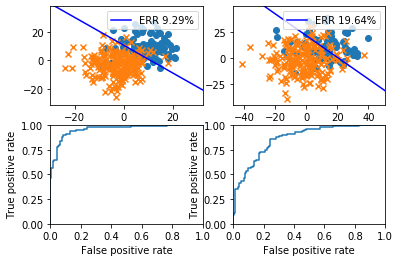

In [25]:
# -*- coding: utf-8 -*-
#
# ロジスティック回帰のROC曲線
#
# 2015/04/24 ver1.0
#

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import rand, multivariate_normal
pd.options.mode.chained_assignment = None

#------------#
# Parameters #
#------------#
Variances = [50,150] # 両クラス共通の分散（2種類の分散で計算を実施）


# データセット {x_n,y_n,type_n} を用意
def prepare_dataset(variance):
    n1 = 80
    n2 = 200
    mu1 = [9,9]
    mu2 = [-3,-3]
    cov1 = np.array([[variance,0],[0,variance]])
    cov2 = np.array([[variance,0],[0,variance]])

    df1 = DataFrame(multivariate_normal(mu1,cov1,n1),columns=['x','y'])
    df1['type'] = 1
    df2 = DataFrame(multivariate_normal(mu2,cov2,n2),columns=['x','y'])
    df2['type'] = 0
    df = pd.concat([df1,df2],ignore_index=True)
    df = df.reindex(np.random.permutation(df.index)).reset_index()
    return df[['x','y','type']]

# ロジスティック回帰を実施
def run_simulation(variance, subplot):
    training_set = prepare_dataset(variance)
    training_set1 = training_set[training_set['type']==1]
    training_set2 = training_set[training_set['type']==0]
    ymin, ymax = training_set.y.min()-5, training_set.y.max()+10
    xmin, xmax = training_set.x.min()-5, training_set.x.max()+10
    subplot.set_ylim([ymin-1, ymax+1])
    subplot.set_xlim([xmin-1, xmax+1])
    # 分類データを表示
    subplot.scatter(training_set1.x, training_set1.y, marker='o', label=None)
    subplot.scatter(training_set2.x, training_set2.y, marker='x', label=None)

    training_set['bias'] = 1
    w = np.array([[0],[0.1],[0.1]])
    phi = training_set[['bias','x','y']]
    phi = phi.as_matrix(columns=['bias','x','y'])
    t = training_set[['type']]
    t = t.as_matrix()

    # 最大100回のIterationを実施
    for i in range(100):
        # IRLS法によるパラメータの修正
        y = np.array([])
        for line in phi:
            a = np.dot(line, w)
            y = np.append(y, [1.0/(1.0+np.exp(-a))])
        r = np.diag(y*(1-y)) 
        y = y[np.newaxis,:].T
        tmp1 = np.linalg.inv(np.dot(np.dot(phi.T, r),phi))
        tmp2 = np.dot(phi.T, (y-t))
        w_new = w - np.dot(tmp1, tmp2)
        # パラメータの変化が 0.1% 未満になったら終了
        if np.dot((w_new-w).T, (w_new-w)) < 0.001 * np.dot(w.T, w):
            w = w_new
            break
        w = w_new

    # 分類誤差の計算と確率付きデータの用意
    d0, dx, dy = w[0], w[1], w[2]
    err = 0
    training_set['probability'] = 0.0
    for index, line in training_set.iterrows():
        a = np.dot(np.array([1, line.x, line.y]), w)
        p = 1.0/(1.0+np.exp(-a))
        training_set.ix[index, 'probability'] = p
        if (p-0.5)*(line.type*2-1) < 0:
            err += 1
    err_rate = err * 100 / len(training_set)
    # 境界線（P=0.5）を表示
    linex = np.arange(xmin-5, xmax+5)
    liney = - linex * dx / dy - d0 / dy
    label = "ERR %.2f%%" % err_rate
    subplot.plot(linex,liney ,label=label, color='blue')
    subplot.legend(loc=1)
    result = training_set.sort_values(by=['probability'], ascending=[False])
    # 確率付きデータを返却
    return result.reset_index()

# ROC曲線の表示
def draw_roc(result, subplot):
    positives = len(result[result['type']==1])
    negatives = len(result[result['type']==0])
    tp = [0.0] * len(result)
    fp = [0.0] * len(result)
    for index, line in result.iterrows():
        for c in np.arange(0, len(result)):
            if index < c:
                if line.type == 1:
                    tp[c] += 1
                else:
                    fp[c] += 1
    tp_rate = np.array(tp) / positives
    fp_rate = np.array(fp) / negatives

    subplot.set_ylim([0, 1])
    subplot.set_xlim([0, 1])
    subplot.set_xlabel("False positive rate")
    subplot.set_ylabel("True positive rate")
    subplot.plot(fp_rate, tp_rate)

# Main
if __name__ == '__main__':
    fig = plt.figure()
    for c, variance in enumerate(Variances):
        subplots = fig.add_subplot(2,2,c+1)
        result = run_simulation(variance, subplots)
        subplots = fig.add_subplot(2,2,c+2+1)
        draw_roc(result, subplots)
    fig.show()


### 第６章　k平均法  
「教師なし学習」による「クラスタリング」・・・目的変数のないデータをグループ分け  
  
アルゴリズム
1. 代表点を適当に２点とる。
2. トレーニングセットの各点を、ユークリッド距離の近い方の代表点のグループに属させる。
3. 各グループの重心を新たな代表点とする。
4. 2,3を代表点の位置が変化しなくなるまで繰り返す。

In [31]:
# -*- coding: utf-8 -*-
#
# k平均法による画像の減色処理
#
# 2015/04/24 ver1.0
#

import numpy as np
from numpy.random import randint
from PIL import Image

#------------#
# Parameters #
#------------#
Colors = [2, 3, 5, 16]  # 減色後の色数（任意の個数の色数を指定できます）


# k平均法による減色処理
def run_kmeans(pixels, k):
    cls = [0] * len(pixels)

    # 代表色の初期値をランダムに設定
    center = []
    for i in range(k):
        center.append(np.array([randint(256), randint(256), randint(256)]))
    print ("Initial centers:",)
    print (map(lambda x: x.tolist(), center))
    print ("========================")
    distortion = 0.0

    # 最大50回のIterationを実施
    for iter_num in range(50): 
        center_new = []
        for i in range(k):
            center_new.append(np.array([0,0,0]))
        num_points = [0] * k
        distortion_new = 0.0

        # E Phase: 各データが属するグループ（代表色）を計算
        for pix, point in enumerate(pixels):
            min_dist = 256*256*3
            point = np.array(point)
            for i in range(k):
                d = sum([x*x for x in point-center[i]])
                if d < min_dist:
                    min_dist = d
                    cls[pix] = i
            center_new[cls[pix]] += point
            num_points[cls[pix]] += 1
            distortion_new += min_dist

        # M Phase: 新しい代表色を計算
        for i in range(k):
            center_new[i] = center_new[i] / num_points[i]
        center = center_new
        print (map(lambda x: x.tolist(), center))
        print ("Distortion: J=%d" % distortion_new)

        # Distortion(J)の変化が0.1%未満になったら終了
        if iter_num > 0 and distortion - distortion_new < distortion * 0.001:
            break
        distortion = distortion_new

    # 画像データの各ピクセルを代表色で置き換え
    for pix, point in enumerate(pixels):
        pixels[pix] = tuple(center[cls[pix]])

    return pixels
        
# Main
if __name__ == '__main__':
    for k in Colors:
        print ("")
        print ("========================")
        print ("Number of clusters: K=%d" % k)
        # 画像ファイルの読み込み
        im = Image.open("photo.jpg")
        pixels = list(im.convert('RGB').getdata())
        # k平均法による減色処理
        result = run_kmeans(pixels, k)
        # 画像データの更新とファイル出力
        im.putdata(result) # Update image
        im.save("output%02d.bmp" % k, "BMP")




Number of clusters: K=2
Initial centers:
Distortion: J=5403261267
Distortion: J=1262373582
Distortion: J=949201549
Distortion: J=905162209
Distortion: J=899452909
Distortion: J=898779941


TypeError: integer argument expected, got float

### 第７章　EMアルゴリズム


In [41]:
# -*- coding: utf-8 -*-
#
# 手書き文字サンプルの抽出
#
# 2015/06/08 ver1.0
#

import re
from subprocess import Popen, PIPE

#------------#
# Parameters #
#------------#
Num = 600           # 抽出する文字数
Chars = '[036]'     # 抽出する数字（任意の個数の数字を指定可能）


labels = open('train-labels.txt', 'r')
images = open('train-images.txt', 'r')
labels_out = open('sample-labels.txt', 'w')
images_out = open('sample-images.txt', 'w')
chars = re.compile(Chars)

while True:
    label = labels.readline()
    image = images.readline()
    if (not image) or (not label):
        break
    if not chars.search(label):
        continue

    line = ''
    for c in image.split(" "):
        if int(c) > 127:
            line += '1,'
        else:
            line += '0,'
    line = line[:-1]
    labels_out.write(label)
    images_out.write(line + '\n')
    Num -= 1
    if Num == 0:
        break

labels.close()
images.close()
labels_out.close()
images_out.close()

images = open('sample-images.txt', 'r')
samples = open('samples.txt', 'w')
c = 0

while True:
    line = images.readline()
    if not line:
        break
    x = 0
    for s in line.split(','):
        if int(s) == 1:
            samples.write('#')
        else:
            samples.write(' ')
        x += 1
        if x % 28 == 0:
            samples.write('\n')
    c += 1
    if c == 10:
        break

images.close()
samples.close()



/Users/aoyagi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


iter_num 0


/Users/aoyagi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


iter_num 1
iter_num 2
iter_num 3
iter_num 4
iter_num 5
iter_num 6
iter_num 7
iter_num 8
iter_num 9


/Users/aoyagi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


AttributeError: 'Series' object has no attribute 'reshape'

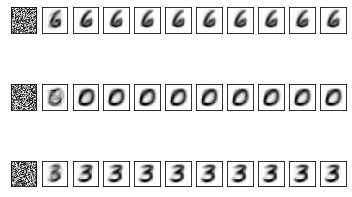

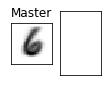

In [42]:
# -*- coding: utf-8 -*-
#
# 混合ベルヌーイ分布による手書き文字分類
#
# 2015/04/24 ver1.0
#

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randint, rand

#------------#
# Parameters #
#------------#
K = 3   # 分類する文字数
N = 10  # 反復回数


# 分類結果の表示
def show_figure(mu, cls):
    fig = plt.figure()
    for c in range(K):
        subplot = fig.add_subplot(K,7,c*7+1)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.set_title('Master')
        subplot.imshow(mu[c].reshape(28,28), cmap=plt.cm.gray_r)
        i = 1
        for j in range(len(cls)):
            if cls[j] == c:
                subplot = fig.add_subplot(K,7,c*7+i+1)
                subplot.set_xticks([])
                subplot.set_yticks([])
                subplot.imshow(df.ix[j].reshape(28,28), cmap=plt.cm.gray_r)
                i += 1
                if i > 6:
                    break
    fig.show()

# ベルヌーイ分布
def bern(x, mu):
    r = 1.0
    for x_i, mu_i in zip(x, mu):
        if x_i == 1:
            r *= mu_i 
        else:
            r *= (1.0 - mu_i)
    return r

# Main
if __name__ == '__main__':
    # トレーニングセットの読み込み
    df = pd.read_csv('sample-images.txt', sep=",", header=None)
    data_num = len(df)

    # 初期パラメータの設定
    mix = [1.0/K] * K
    mu = (rand(28*28*K)*0.5+0.25).reshape(K, 28*28)
    for k in range(K):
        mu[k] /= mu[k].sum()

    fig = plt.figure()
    for k in range(K):
        subplot = fig.add_subplot(K, N+1, k*(N+1)+1)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(mu[k].reshape(28,28), cmap=plt.cm.gray_r)
    fig.show()

    # N回のIterationを実施
    for iter_num in range(N):
        print ("iter_num %d" % iter_num)

        # E phase
        resp = DataFrame()
        for index, line in df.iterrows():
            tmp = []
            for k in range(K):
                a = mix[k] * bern(line, mu[k])
                if a == 0:
                    tmp.append(0.0)
                else:
                    s = 0.0
                    for kk in range(K):
                        s += mix[kk] * bern(line, mu[kk])
                    tmp.append(a/s)
            resp = resp.append([tmp], ignore_index=True)

        # M phase
        mu = np.zeros((K, 28*28))
        for k in range(K):
            nk = resp[k].sum()
            mix[k] = nk/data_num
            for index, line in df.iterrows():
                mu[k] += line * resp[k][index]
            mu[k] /= nk

            subplot = fig.add_subplot(K, N+1, k*(N+1)+(iter_num+1)+1)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.imshow(mu[k].reshape(28,28), cmap=plt.cm.gray_r)
        fig.show()

    # トレーニングセットの文字を分類
    cls = []
    for index, line in resp.iterrows():
        cls.append(np.argmax(line[0:]))

    # 分類結果の表示
    show_figure(mu, cls)



### 第８章　ベイズ推定


/Users/aoyagi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/aoyagi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


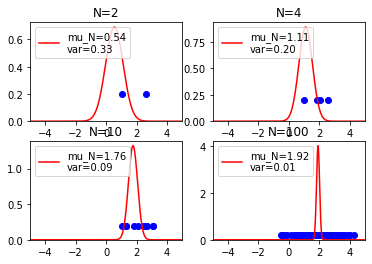

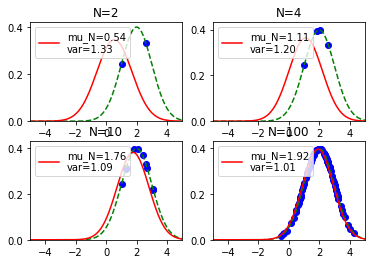

In [43]:
# -*- coding: utf-8 -*-
#
# ベイズ推定による正規分布の推定
#
# 2015/06/13 ver1.0
#

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import normal
from scipy.stats import norm

# Main
if __name__ == '__main__':

    # 真の分布
    mu_true = 2.0
    beta_true = 1.0

    # 事前分布
    mu_0 = -2.0
    beta_0 = 1.0

    fig1 = plt.figure()
    fig2 = plt.figure()
    ds = normal(loc=mu_true, scale=1.0/beta_true, size=100)

    for c, n in enumerate([2,4,10,100]): # トレーニングセットのデータ数
        trainset = ds[0:n]
        mu_ML = np.mean(trainset)
        mu_N = (beta_true*mu_ML + beta_0*mu_0/n)/(beta_true+beta_0/n)
        beta_N = beta_0 + n*beta_true

    # 平均μの推定結果を表示
        subplot = fig1.add_subplot(2,2,c+1)
        subplot.set_title("N=%d" % n)
        linex = np.arange(-10,10.1,0.01)

        # 平均μの確率分布
        sigma = 1.0/beta_N
        mu_est = norm(loc=mu_N, scale=np.sqrt(sigma))
        label = "mu_N=%.2f\nvar=%.2f" % (mu_N, sigma)
        subplot.plot(linex, mu_est.pdf(linex), color='red', label=label)
        subplot.legend(loc=2)

        # トレーニングセットを表示
        subplot.scatter(trainset, [0.2]*n, marker='o', color='blue')
        subplot.set_xlim(-5,5)
        subplot.set_ylim(0)


    # 次に得られるデータの推定分布を表示
        subplot = fig2.add_subplot(2,2,c+1)
        subplot.set_title("N=%d" % n)
        linex = np.arange(-10,10.1,0.01)

        # 真の分布を表示
        orig = norm(loc=mu_true, scale=np.sqrt(1.0/beta_true))
        subplot.plot(linex, orig.pdf(linex), color='green', linestyle='--')

        # 推定分布を表示
        sigma = 1.0/beta_true+1.0/beta_N
        mu_est = norm(loc=mu_N, scale=np.sqrt(sigma))
        label = "mu_N=%.2f\nvar=%.2f" % (mu_N, sigma)
        subplot.plot(linex, mu_est.pdf(linex), color='red', label=label)
        subplot.legend(loc=2)

        # トレーニングセットを表示
        subplot.scatter(trainset, orig.pdf(trainset), marker='o', color='blue')
        subplot.set_xlim(-5,5)
        subplot.set_ylim(0)

    fig1.show()
    fig2.show()



/Users/aoyagi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in sqrt
/Users/aoyagi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:130: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/aoyagi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:131: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


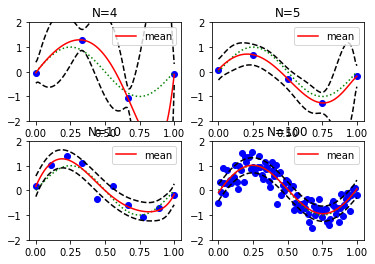

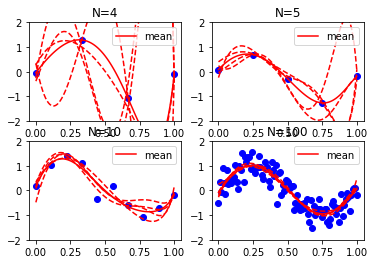

In [44]:
# -*- coding: utf-8 -*-
#
# ベイズ推定による回帰分析
#
# 2015/06/23 ver1.0
#

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import normal, multivariate_normal

beta = 1.0/(0.3)**2     # 真の分布の分散
alpha = 1.0/100**2      # 事前分布の分散
order = 9               # 多項式の字数

# データセット {x_n,y_n} (n=1...N) を用意
def create_dataset(num):
    dataset = DataFrame(columns=['x','y'])
    for i in range(num):
        x = float(i)/float(num-1)
        y = np.sin(2.0*np.pi*x) + normal(scale=0.3)
        dataset = dataset.append(Series([x,y], index=['x','y']),
                                 ignore_index=True)
    return dataset

# 事後分布に基づく推定曲線、および、事後分布の平均と分散を計算
def resolve(dataset, m):
    t = dataset.y
    phis = DataFrame()
    for i in range(0,m+1):
        p = dataset.x**i
        p.name="x**%d" % i
        phis = pd.concat([phis,p], axis=1)

    for index, line in phis.iterrows():
        phi = DataFrame(line)
        if index == 0:
            phiphi = np.dot(phi,phi.T)
        else:
            phiphi += np.dot(phi,phi.T)
    s_inv = alpha * DataFrame(np.identity(m+1)) + beta * phiphi
    s = np.linalg.inv(s_inv) # 事後分布の共分散行列

    # 平均 m(x)
    def mean_fun(x0):
        phi_x0 = DataFrame([x0 ** i for i in range(0,m+1)])
        for index, line in phis.iterrows():
            if index == 0:
                tmp = t[index] * line
            else:
                tmp += t[index] * line
        return (beta * np.dot(np.dot(phi_x0.T, s), DataFrame(tmp))).flatten()

    # 標準偏差 s(x)
    def deviation_fun(x0):
        phi_x0 = DataFrame([x0 ** i for i in range(0,m+1)])
        deviation = np.sqrt(1.0/beta + np.dot(np.dot(phi_x0.T, s), phi_x0))
        return deviation.diagonal()

    for index, line in phis.iterrows():
        if index == 0:
            tmp = t[index] * line
        else:
            tmp += t[index] * line
    mean = beta * np.dot(s, DataFrame(tmp)).flatten() # 事後分布の平均

    return mean_fun, deviation_fun, mean, s

# Main
if __name__ == '__main__':
    df_ws = DataFrame()

    fig1 = plt.figure()
    fig2 = plt.figure()
    for c, num in enumerate([4,5,10,100]): # トレーニングセットのデータ数
        train_set = create_dataset(num)
        mean_fun, deviation_fun, mean, sigma = resolve(train_set, order)
        ws_samples = DataFrame(multivariate_normal(mean,sigma,4))

        subplot1 = fig1.add_subplot(2,2,c+1)
        subplot1.set_xlim(-0.05,1.05)
        subplot1.set_ylim(-2,2)
        subplot1.set_title("N=%d" % num)

        subplot2 = fig2.add_subplot(2,2,c+1)
        subplot2.set_xlim(-0.05,1.05)
        subplot2.set_ylim(-2,2)
        subplot2.set_title("N=%d" % num)

        # トレーニングセットを表示
        subplot1.scatter(train_set.x, train_set.y,
                         marker='o', color='blue', label=None)
        subplot2.scatter(train_set.x, train_set.y,
                         marker='o', color='blue', label=None)

        linex = np.arange(0,1.01,0.01)

        # 真の曲線を表示
        liney = np.sin(2*np.pi*linex)
        subplot1.plot(linex, liney, color='green',linestyle=':')

        # 平均と標準偏差の曲線を表示
        m = np.array(mean_fun(linex))
        d = np.array(deviation_fun(linex))
        subplot1.plot(linex, m, color='red', label='mean')
        subplot1.legend(loc=1)
        subplot1.plot(linex, m-d, color='black', linestyle='--')
        subplot1.plot(linex, m+d, color='black', linestyle='--')

        # 多項式のサンプルを表示
        m = np.array(mean_fun(linex))
        d = np.array(deviation_fun(linex))
        liney = m
        subplot2.plot(linex, liney, color='red', label="mean")
        subplot2.legend(loc=1)

        def f(x, ws):
            y = 0
            for i, w in enumerate(ws):
                y += w * (x ** i)
            return y

        for index, ws in ws_samples.iterrows():
            liney = f(linex, ws)
            subplot2.plot(linex, liney, color='red', linestyle='--')

    fig1.show()
    fig2.show()

